# Introduction to Derivatives, Integrals and Numerical Integration

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Derivatives for (astro)physicists

Let's introduce derivatives in a way that's connected to quantities we intuitively understand -- velocities, acceleration, etc. Let's start with velocity.

What is velocity? **It is the rate of change of the object's position.**

If an object is at some location $x_0$ at time $t_0$, and at short time $t_1 = t_0 + \Delta t$ later it is at $x_1 = x_0 + \Delta x$, the average velocity in the time interval from $t_0$ to $t_1$ would be defined as:

$$ \bar{v} = \frac{x_1 - x_0}{t_1 - t_0} = \frac{\Delta x}{\Delta t}$$

(in physics, average quantities are often denoted with a bar over the symbol -- e.g. average number of objects $\bar{n}$, average temperature $\bar{T}$, etc. Sometimes "angle brackets" are also used; e.g. $\left<n\right>$ or $\left<T\right>$).

Now let's imagine the interval between $t_1$ and $t_0$ -- the $\Delta t$ -- becoming shorter and shorter, and approaching zero (which we'd mathematically write as $\Delta t \rightarrow 0$). In such a limit, we get the *instantaneous* velocity (or just "velocity"):

$$ v = \lim_{\Delta t \rightarrow 0} \frac{\Delta x}{\Delta t} = \frac{dx}{dt} $$

I.e., velocity is the *derivative* of position -- it is its **instantaneous rate of change**.

**In general, this is what all derivatives are; they tell us how quickly the quantity being observed changes.** Another example is acceleration -- this is the rate of change of velocity; accelerating more means you're gaing velocity faster (and vice versa). Or, in economics, anything that has the word "marginal" attached to it (marginal cost, marginal utility, marginal tax rate) -- it's the derivative of that thing the word "marginal" refers to.

This relationship has a simple graphical interpretation. If the position of a body, $x$, at times $t$ is plotted on a graph (below), then the velocity is the *slope* of that graph.

"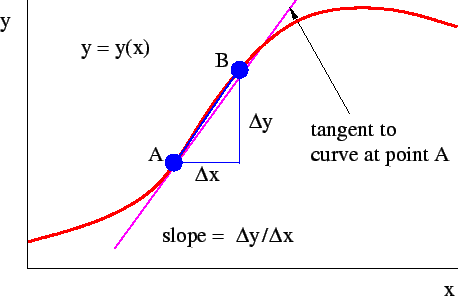"

Note: in the plot above, which I stole from [here](http://labman.phys.utk.edu/phys135core/modules/m1/derivatives.html), $x$ plays the role of $t$ and $y$ plays the role of our $x$.

Graphically, derivatives are measures of how steep a slope of a function is -- a horizontal line would have a derivative of zero, while a function whose slope is approaching fully vertical would have the derivative approaching infinity (i.e., a _tiny_ change in the x axis results in a **huge** change along the y axis).

## What are integrals?

If the velocity is obtained from position by *differentiating* it, is there an inverse operation -- something that allows us to obtain the position at some time $t$ if we know the velocity as a function of $t$?

Intuitively, we know this is the case. If I know a (say) car is moving at a constant velocity $v$, I know that after some time $t$ it will have travelled:

$$ x = v \cdot t $$

But what if the velocity is not constant, but it itself is changing with time? I.e., if the velocity is a function of time (denoted as $v(t)$). Then, we can resort to an approximation (note: you'll see this is nearly always the go-to approach in physics and engineering).

Let us imagine that the velocity is not changing smoothly in time, but it's changing in discrete steps. I.e. something like this:

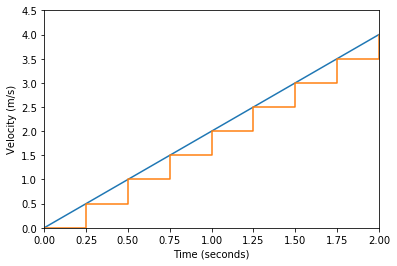

In [3]:
a = 2
t = np.arange(0, 3, 0.25)
v = a * t

plt.plot(t, v)
plt.step(t, v, where='post')
plt.xlim(0, 2)
plt.ylim(0, 4.5)
plt.xlabel("Time (seconds)")
plt.ylabel("Velocity (m/s)");

So, in the example above, we approximate the car as traveling with velocity $v_0 = 0$ in the interval from $0 \le t < 0.25$, then $v_1 = 0.5$ while $0.25 \le t < 0.5$, then $v_2 = 0.5$ while $0.5 \le t < 0.75$, etc. (side note: why do I start my indices at $0$ -- e.g. why start with $v_0$ and not $v_1$? I'll leave it to [Edsger Dijkstra](https://en.wikipedia.org/wiki/Edsger_W._Dijkstra) to [explain](https://www.cs.utexas.edu/users/EWD/transcriptions/EWD08xx/EWD831.html). I admit it's a bit of a "X box is better than PlayStation" situation -- personal preference).

If we make such an approximation, then we know how to calculate how much distance has the car traveled in each of these intervals -- it's just a body moving under constant velocity. So the distance it will cover will be equal to the velocity times the time it travels with that velocity. For interval $i = 1$, where the velocity is $v_1 = 0.5$ in the example above, the length time interval will be equal to $\Delta t = t_2 - t_1 = 0.25$ and in that time interval the object will move a distance of

$$ \Delta x_1 = v_1 \cdot \Delta t_1 = 0.5 \frac{\rm m}{\rm s} \cdot 0.25 {\rm s} = 0.125 {\rm m}$$

(side note: note how I explicitly wrote out the units, and how the units follow the same rules as any other variables in math -- e.g., the seconds cancelled each other out to just leave meters? This is not an accident; it's actually quite powerful way to check your math).

More generally, in any interval $i$, it will shift by:

$$ \Delta x_i = v_i \cdot \Delta t_i $$

To find out where our car will be after a series of such shifts (say, at $t = 2$, corresponding to $i=7$ in our example above), we need to sum all these up intervals up:

$$ x_7 = x_0 + \Delta x_0 + \Delta x_1 + \Delta x_2 + \Delta x_3 + \Delta x_4 + \Delta x_5 + \Delta x_6 + \Delta x_7 $$

(where $x_0$ is the original position of the body -- e.g., if it didn't start at zero, but some other distance from the origin). More compactly this can be written as:

$$ x_7 = x_0 + \sum_{i=0}^{i=7} \Delta x_i = x_0 + \sum_{i=0}^{i=7} v_i \cdot \Delta t_i$$

(side note: note how I've written $\Delta t_i$ above -- i.e., the time interval can be different for each step. In this example all of our intervals are the same -- \Delta t_i = \Delta t = 0.25s -- but more advanced integration techniques use what are called "variable timesteps").

Now, remember what we've set out to do -- figure out how far will the car get if we know how it velocity behaves through time. Did we get that?

Not just yet. Looking at the plot above, we see that our approximation tends to *underestimate* the car's velocity almost all the time. So, just using common sense, we know the computation above will *underpredict* how far the car will travel.

How can we improve it? By making the intervals $\Delta t$ smaller. Take a look at the plot below, and note how as we make the step-wise intervals smaller, the approximate velocity curve get closer and closer to the real velocity line:

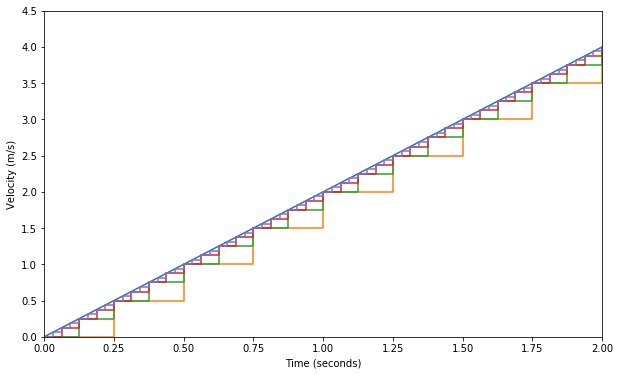

In [4]:
a = 2
t = np.arange(0, 3, 0.25)
v = a * t

plt.figure(figsize=(10,6))
plt.plot(t, v)
plt.xlabel("Time (seconds)")
plt.ylabel("Velocity (m/s)");
plt.xlim(0, 2)
plt.ylim(0, 4.5)

for nsteps in [0.25, 0.125, 0.0625, 0.03125]:
    t = np.arange(0, 3, nsteps)
    v = a * t
    plt.step(t, v, where='post')


(exercise: add even more, shorter, steps to the code above and see how the step-wise curve gets even closer to the line we're trying to approximate).

You can see where this is going: as the interval $\Delta t$ approaches zero, **the step-wise line will become indistinguishable from the smooth line (and therefore our computation of the distance traveled should also become indistinguishable from the real distance traveled)**. I.e.:

$$ x_{\rm end} = x_{\rm begin} + \lim_{\Delta t \rightarrow 0} \sum_{i} v_i \cdot \Delta t_i \equiv  x_{\rm begin} + \int_{t_{\rm begin}}^{t_{\rm end}} v(t) dt$$

.. and we've invented integration ([Reimann integration](https://en.wikipedia.org/wiki/Riemann_integral), to be precise). Congratulation to us!

Just like with the derivatives, the there's a graphical interpretation of integrals as well: they're the areas under the curves of functions being integrated:

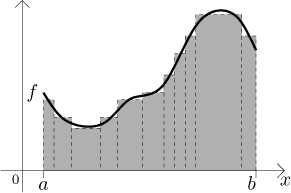

This is very apparent from the graph above: if you look at our approximate sum, you can see this is the sum of rectangles of each small step. And you can also see that in the limit of infinite steps, that sum will be just the area of the triangle.

This holds for all integrals, in general, no matter how complicated the function is (e.g., see the above link about Reimann integration for some visualization).

## The Connection of Derivatives and Integrals

How are derivatives and integrals connected? They're **the inverse of one another**.

Just look at the examples above -- the we obtained the velocity by *differentiating* the position, and we've obtained the position by *integrating* the velocity. The relationship is the same as that of - and +, or * and /. This is why sometimes integrals are called *antiderivatives*.

This is also apparent from the symbols we use. For example, the final position of a body can be thought of as the sum of the starting position, and a sum of many very small (a.k.a [infinitesimal](https://en.wikipedia.org/wiki/Infinitesimal)) shifts $dx$ between times $t_{\rm start}$ and $t_{\rm end}$. We can write that as:

$$ x_{\rm end} = x_{\rm start} + \int_{t_{\rm start}}^{t_{\rm end}} dx $$

but velocity is:

$$ v = \frac{dx}{dt} $$

. Symbols $dx$, $dt$, etc. (usually) work like any other variables in math. So we can treat the above just as we'd treat any other fraction, and substitute $dx = v \cdot dt$ getting:

$$ x_{\rm end} = x_{\rm start} + \int_{t_{\rm start}}^{t_{\rm end}} v \cdot dt $$

like we've had above.

## How do we find solutions to integrals and derivatives?

If (say) the position of my car $x(t)$ is some complicated function of time, say:

$$ x(t) = 2t^2 + \sin(11t) $$

how do I find the velocity of that car at any time $t$? How do I find the actual function (i.e., something where I can plug in numbers for $t$ and find the number for $v$?):

$$ \frac{dx}{dt} = \frac{d}{dt} \left( 2t^2 + \sin(11t) \right) = \, ? $$

The long answer is ... it's complicated to do this *ab initio*. But, many brain-hours were spent over the past few hundred years to compute the derivatives of common functions which are now [tabulated](https://openstax.org/books/calculus-volume-1/pages/b-table-of-derivatives), and we can consult those tables. Second, there are rules on how to take more complex functions and reduce them to various compositions of tabulated functions and differentiate that way (e.g., the [chain rule](https://en.wikipedia.org/wiki/Chain_rule)). For the example above, the solution is:

$$ \frac{dx}{dt} = 4 t + 11 \cos(11t) $$

(by looking up for derivatives of $t^n$ and $\sin(x)$ in the table of derivatives, and using the chain rule for the rest).

Practically, these days we'd just fire up [Mathematica](https://wolframalpha.com/) and let the computer do this for us. Here's how that looks like [for the problem above](https://www.wolframalpha.com/input?i=D%5B2*t%5E2+%2B+%5Csin%2811t%29%2C+t%5D).

What about integrals? Remember they're the inverse of derivatives. So finding a solution to an integral is like asking "what is a function that, when differentiated, would give me the function I'm looking to integrate?". Tables exist for this too (or we use Mathematica or a similar symbolic math package).

## Is it always possible to find solutions to derivatives/integrals?

Let's say I have some very complex function that I can still write down using "common math" (e.g. polynomials and trig functions). Is it always possible to find a derivate and an integral that also only uses such polynomials and trig functions?

Let's look at an example:
$$ f(x) = \sqrt{1-x^4} $$

Can I differentiate this? The answer is yes -- using the chain rule, we quickly find the result is:

$$ f'(x) = -\frac{2 x^3}{\sqrt{1 - x^4}} $$

(try it yourself!). In general, this is true for every derivative -- we can always "handle" them.

What about the integral of our $f(x)$? Is there a function that, when differentiated, returns $f(x)$? The answer is yes, **but it cannot be written down as a combination of polynomials, trig, or other common functions**. Another way of saying this is that this is not an [elementary integral](https://en.wikipedia.org/wiki/Nonelementary_integral).

Think for a bit what this means: there are functions (infinitely many!) that exist, that we cannot write down (or even easily compute) using the normal "tooling" that we've learned in math! To make matters worse, it's actually **rare** for a function to have an elementary integral -- when it happens those are the exceptions, rather than the rule. Most functions are "unwritable" in [closed form](https://en.wikipedia.org/wiki/Closed-form_expression)!

## Numerical integration

So what do we do then...? Are there any functions of real-world interest where an analytic integral does not exist, yet we'd like to know the results? **Yes!**

Example 1: the integral of $\exp(-x^2)$ (also known as the Gaussian or the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), aka the "bell curve"). This shows up all the time in probablity, physics, economics, etc. yet it doesn't have an analytically expressible integral.

Example 2: trajectory of a body moving in the gravitational fields of the Earth and the Sun. This is the famous "[three body problem](https://en.wikipedia.org/wiki/Three-body_problem)". In fact, for Newton's gravity, only the two-body problem (a body moving in the gravitational field of just *one* other body) is analytically solvable (and results in ellipses, parabolae and hyperbolae).

What do we do then? We go back to the definition of Reimann integration and **integrate numerically**.

Let's look at an example for:

$$ f(x) = \sqrt{1-x^4} $$

and say we wish to know the value of:

$$ I = \int_{x=0}^{x=1} f(x) dx = \int_{x=0}^{x=1} \sqrt{1-x^4} dx $$

let's whip up some quick Python code to integrate this numerically:

I      = 0.9109933816
I_true = 0.8740191848


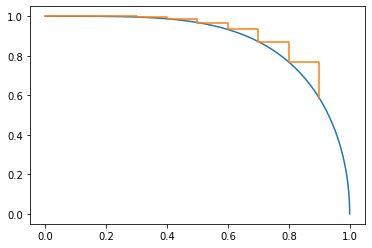

In [5]:
# define our function f(x)
def f(x):
    return np.sqrt(1 - x**4)

# make a plot of the function
x = np.linspace(0, 1, 10000)
plt.plot(x, f(x))

# numerical integration:
dx = 0.1                 # define a short interval dx
x = np.arange(0, 1, dx)  # define a list of numbers between [0, 1), all dx-distance apart
fx = f(x)                # compute the value of our function at those positions
dI = fx*dx               # now compute the areas of tiny rectangles dx wide and f(x) high...
I = sum(dI)              # and finally, sum them up.

plt.step(x, f(x), where='post')        # over plot our approximation

# let's print the solution
print("I      = {:0.10f}".format(I))

# and compare it to the exact solution that Wolfram Alpha gives us:
# https://www.wolframalpha.com/input?i=integrate+%5Csqrt%7B1-x%5E4%7D+from+x%3D0+to+1
print("I_true = {:0.10f}".format(0.8740191847640399368216131966303731378942516504772077209389405679))

# for the value dx=0.1, you'll find this to be quite far off (about ~5% error)
# try changing dx to 0.01 and rerunning; you should find the error go down to 0.5%! 

Study the code above to understand how it works (there's lots of non-trivial Python and numpy in there as well!).

Numerical integration is how we do the vast majority of physics and all physical sciences. It's the major reason for the existence of supercomputers -- it takes a lot of computational power to compute all those small rectangles and sum them up together!

There's also such a thing as **numerical differentiation**. Why would we need that, if I mentioned that it's possible to differentiate every analytical expression? It's because if we start with an expression we can't write analytically -- e.g., an integral like the above -- it's not a given that its derivative can be written using the "normal" functions. ( Proof: the integral $I$ of $f(x)$ above is not closed form. Now imagine we further integrate that integral (let's call it $J$. Then, by definition, the derivative of $J$ is $I$ (and $I$ is not closed form). Q.E.D. )

## Better numerical integration

This just the beginning of the story of integration (both numerical and analytic). The integration technique I've implemented above is by far the simplest, but also the least accurate. Since the 1600s, many [integration techniques](https://math.libretexts.org/Courses/Mount_Royal_University/MATH_2200%3A_Calculus_for_Scientists_II/2%3A_Techniques_of_Integration/2.5%3A_Numerical_Integration_-_Midpoint%2C_Trapezoid%2C_Simpson's_rule) have been invented to give better results, with fewer computations.

Here's a simple example, improving on what we've done so far. Recall the integral from the beginning:

I      = 3.5 m
I_true = 4 m


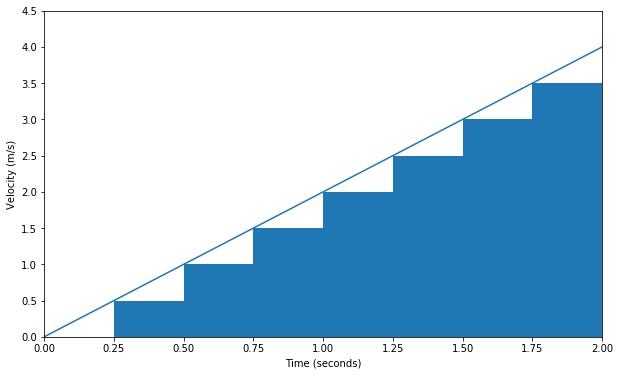

In [6]:
a = 2
dt = 0.25
t = np.arange(0, 3, dt)
v = a * t

plt.figure(figsize=(10,6))
plt.plot(t, v)
plt.xlabel("Time (seconds)")
plt.ylabel("Velocity (m/s)");
plt.xlim(0, 2)
plt.ylim(0, 4.5)

v = a * t
plt.fill_between(t, v, step='post')  # plot

dI = v*dt                       # areas of the small rectangles
I = sum( dI[(0 <=t) & (t<2)] )  # select only those with 0 <= t < 2 (integration bounds), and sum them up

print(f"I      = {I:.5} m")
print(f"I_true = 4 m")

Our technique clearly underestimate the area under the curve. Why? It's because for the value of the function throughout each step, we take its value at the *beginning* of each step.

How can we improve? How about if we used the velocity as it is at the *middle* of each step?

I      = 4.0 m
I_true = 4 m


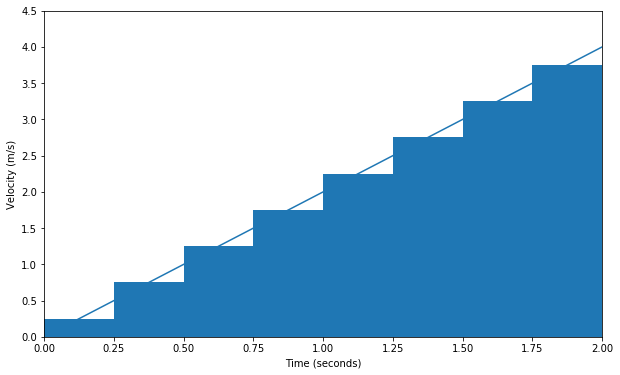

In [7]:
a = 2
dt = 0.25
t = np.arange(0, 3, dt)
v = a * t

plt.figure(figsize=(10,6))
plt.plot(t, v)
plt.xlabel("Time (seconds)")
plt.ylabel("Velocity (m/s)");
plt.xlim(0, 2)
plt.ylim(0, 4.5)

v = a * (t + dt/2)                   ######## <<<<<-------- THIS IS THE ONLY CHANGE !!!
plt.fill_between(t, v, step='post')  # plot

dI = v*dt                       # areas of the small rectangles
I = sum( dI[(0 <=t) & (t<2)] )  # select only those with 0 <= t < 2 (integration bounds), and sum them up

print(f"I      = {I:.5} m")
print(f"I_true = 4 m")

Voilá! The integral is now not only better, but exact!

What we've developed here is the [midpoint rule](https://en.wikipedia.org/wiki/Riemann_sum#Midpoint_rule). It gives exact results only for straight lines (can you tell why?), but it gives a *better* result for all function in general than the left or right rule we've used before.

## Let's practice

Let's practice numerical integration using different techniques (see [here](https://en.wikipedia.org/wiki/Riemann_sum#Riemann_summation_methods)):

1. Write Python code to numerically integrate $ f(x) = sin(x^2) $ from $0$ to $2 \pi$ using the ["left rule"](https://en.wikipedia.org/wiki/Riemann_sum#Riemann_summation_methods). Use $dx=0.1$, $dx=0.01$, $dx=0.001$ and $dx=0.0001$ (i.e., compute four different approximations). Use [Wolfram Alpha](https://www.wolframalpha.com/) to compute the exact solution, and compare how the approximation gets better.

2. Now repeat the above, but implement the "mid-point rule". Check again how your results compare to the exact solution.

3. Now repeat the above, but implement the "trapezoid rule". Check again how the results compare to the exact solution.

Comparing the solutions is best done by computing and plotting the "residuals" -- the difference between the approximation and the true value -- as a function of $dx$. I.e., something like this:

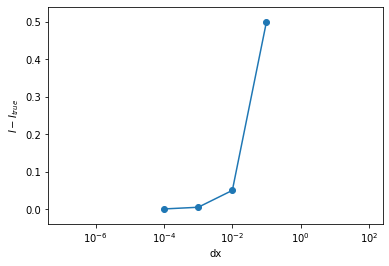

In [8]:
dx = np.asarray([0.1, 0.01, 0.001, 0.0001])
I = np.asarray([5.5, 5.05, 5.005, 5.0005])  # <-- these are the values your code will compute; I made them up here...
I_true = 5

resid = I - I_true
plt.xscale("log");
plt.scatter(dx, resid)
plt.plot(dx, resid)
plt.xlabel("dx")
plt.ylabel("$I - I_{true}$");

What you should find (if everyting goes right), is a) that the accuracy grows as $dx$ becomes smaller and b) that the left and right rules are similarly precise, mid-point rule is more precise, and the trapesoid rule is the most precise of the four.